# Weights & Biases workshop

## Q1. Install the Package
To get started with Weights & Biases you'll need to install the appropriate Python package.

For this we recommend creating a separate Python environment, for example, you can use conda environments, and then install the package there with pip or conda.

Following are the libraries you need to install:

pandas
matplotlib
scikit-learn
pyarrow
wandb
Once you installed the package, run the command wandb --version and check the output.

What's the version that you have?

Let's execute - 'wandb --version' in a command line. Output: wandb, version 0.15.3

## Answer: version 0.15.3

## Q2. Download and preprocess the data
We'll use the Green Taxi Trip Records dataset to predict the amount of tips for each trip.

Download the data for January, February and March 2022 in parquet format from here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

Use the script preprocess_data.py located in the folder homework-wandb to preprocess the data.

The script will:

- initialize a Weights & Biases run.
- load the data from the folder <TAXI_DATA_FOLDER> (the folder where you have downloaded the data),
- fit a DictVectorizer on the training set (January 2022 data),
- save the preprocessed datasets and the DictVectorizer to your Weights & Biases dashboard as an artifact of type preprocessed_dataset.

Question: Once you navigate to the Files tab of your artifact on your Weights & Biases page, what's the size of the saved DictVectorizer file?

- 54 kB
- 154 kB
- 54 MB
- 154 MB

## Let's execute following command: 
 python preprocess_data.py \
  --wandb_project <WANDB_PROJECT_NAME> \
  --wandb_entity <WANDB_USERNAME> \
  --raw_data_path <TAXI_DATA_FOLDER> \
  --dest_path ./output

On the Files tab of my artifact on my Weights & Biases page I see that size of DictVectorizer file is 154 

## Answer:
- 154 kB

## Q3. Train a model with Weights & Biases logging
We will train a RandomForestRegressor (from Scikit-Learn) on the taxi dataset.

We have prepared the training script train.py for this exercise, which can be also found in the folder homework-wandb.

The script will:

- initialize a Weights & Biases run.
- load the preprocessed datasets by fetching them from the Weights & Biases artifact previously created,
- train the model on the training set,
- calculate the MSE score on the validation set and log it to Weights & Biases,
- save the trained model and log it to Weights & Biases as a model artifact.

Your task is to modify the script to enable to add Weights & Biases logging, execute the script and then check the Weights & Biases run UI to check that the experiment run was properly tracked.

- TODO 1: log mse to Weights & Biases under the key "MSE"

- TODO 2: log regressor.pkl as an artifact of type model, refer to the official docs in order to know more about logging artifacts.

## Question:  Once you have successfully ran the script, navigate the Overview section of the run in the Weights & Biases UI and scroll down to the Configs. What is the value of the max_depth parameter:

- 4
- 6
- 8
- 10

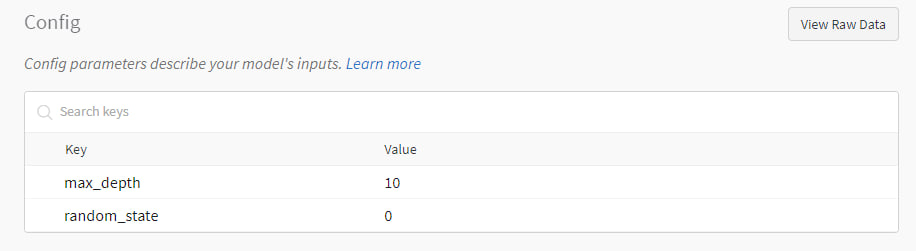

## Answer: 
* The value of the max_depth parameter is 10

## Q4. Tune model hyperparameters
Now let's try to reduce the validation error by tuning the hyperparameters of the RandomForestRegressor using Weights & Biases Sweeps. We have prepared the script sweep.py for this exercise in the homework-wandb directory.

Your task is to modify sweep.py to pass the parameters n_estimators, min_samples_split and min_samples_leaf from config to RandomForestRegressor inside the run_train() function. Then we will run the sweep to figure out not only the best best of hyperparameters for training our model, but also to analyze the most optimum trends in different hyperparameters.

This command will run the sweep for 5 iterations using the Bayesian Optimization and HyperBand method proposed by the paper BOHB: Robust and Efficient Hyperparameter Optimization at Scale. You can take a look at the sweep on your Weights & Biases dashboard, take a look at the Parameter Inportance Panel and the Parallel Coordinates Plot to determine, and analyze which hyperparameter is the most important:

- max_depth
- n_estimators
- min_samples_split
- min_samples_leaf

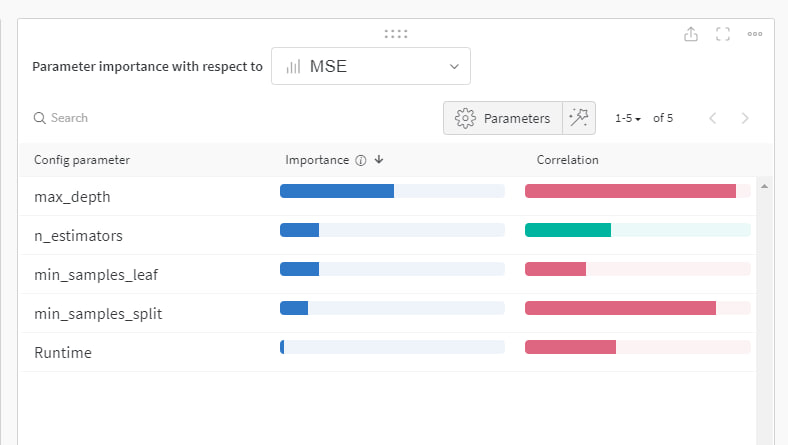

## Answer:
- max_depth

## Q5. Link the best model to the model registry
Now that we have obtained the optimal set of hyperparameters and trained the best model, we can assume that we are ready to test some of these models in production. In this exercise, you'll create a model registry and link the best model from the Sweep to the model registry.

First, you will need to create a Registered Model to hold all the candidate models for your particular modeling task. You can refer to this section of the official docs to learn how to create a registered model using the Weights & Biases UI.

Once you have created the Registered Model successfully, you can navigate to the best run of your sweep, navigate to the model artifact created by the particular run, and click on the Link to Registry option from the UI. This would link the model artifact to the Registered Model. You can choose to add some suitable aliases for the Registered Model, such as production, best, etc.

Now that the model artifact is linked to the Registered Model, which of these information do we see on the Registered Model UI?

- Versioning
- Metadata
- Aliases
- Metric (MSE)
- Source run
- All of these
- None of these


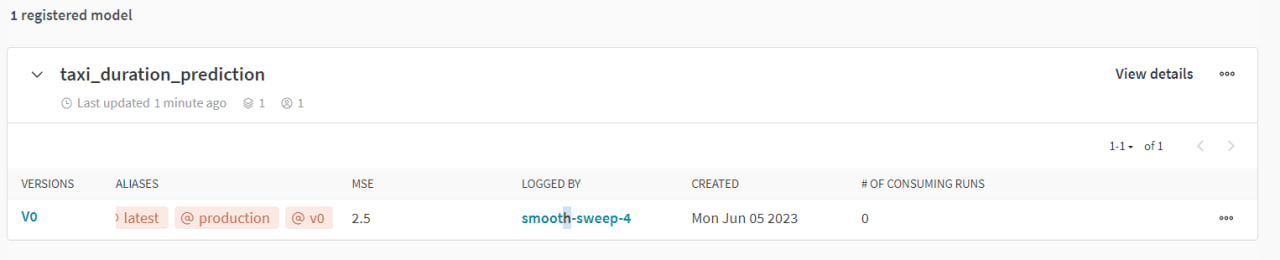

## Answer: 
- Versioning
- Aliases
- Metric (MSE)